## Entrenamiento

#### Importación de las librerías

In [1]:
import pyarrow.feather as feather
import importlib
import numpy as np
import matplotlib.pyplot as plt
import utils.train_utils as train_utils
import utils.plot_utils as plot_utils
from torchsummary import summary
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
import torch
import mlflow

import pickle 
from torch import nn

importlib.reload(train_utils)
importlib.reload(plot_utils)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from utils.train_utils import Model, evaluate_model, fit_model, perform_grid_search, evaluate_model_mlflow
from sklearn.cluster import KMeans
import torch.optim as optim
from torch.utils.data import Dataset
from utils.plot_utils import plot_roc_curve
from sklearn.model_selection import GridSearchCV
from urllib.parse import urlparse
from mlflow.tracking import MlflowClient



#### Create mlflow experiment

In [2]:
client = MlflowClient()
experiment_id = client.create_experiment("airport_220420_2")

#### Cargado de datos

In [3]:
X_train = feather.read_feather("./results/X_train.ftr")
X_test = feather.read_feather("./results/X_test.ftr")
y_train = feather.read_feather("./results/y_train.ftr").to_numpy().ravel()
y_test = feather.read_feather("./results/y_test.ftr").to_numpy().ravel()

In [4]:
models = {}

### Adaboost

{'n_estimators': 150, 'random_state': 0}
Grid search time: 301.22805170000356 s
ROC_AUC = 0.9280912145880775

              precision    recall  f1-score   support

           0    0.94091   0.93090   0.93588     14573
           1    0.91287   0.92528   0.91904     11403

    accuracy                        0.92843     25976
   macro avg    0.92689   0.92809   0.92746     25976
weighted avg    0.92860   0.92843   0.92848     25976

Training time: 21.24748360000376 s


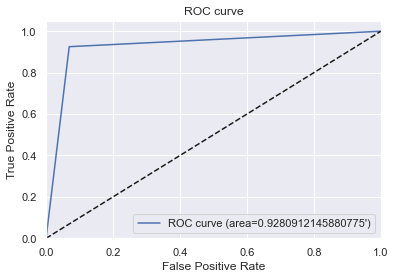

In [18]:
params = {'n_estimators': [100, 150, 200], "random_state": [0]}
model = evaluate_model_mlflow(AdaBoostClassifier, X_train, y_train, X_test, y_test, params, models, "model_ad", experiment_id) 

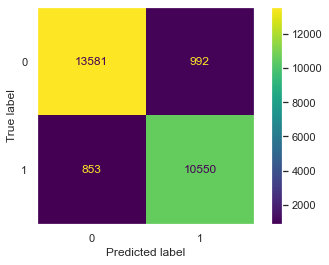

In [33]:
model.confusion_matrix(X_test, y_test)

### SVM

{'kernel': 'rbf'}
Grid search time: 2002.5301034 s
ROC_AUC = 0.9548056568894316

              precision    recall  f1-score   support

           0    0.96134   0.95890   0.96012     14573
           1    0.94764   0.95071   0.94917     11403

    accuracy                        0.95530     25976
   macro avg    0.95449   0.95481   0.95465     25976
weighted avg    0.95532   0.95530   0.95531     25976

Training time: 388.08541739999964 s


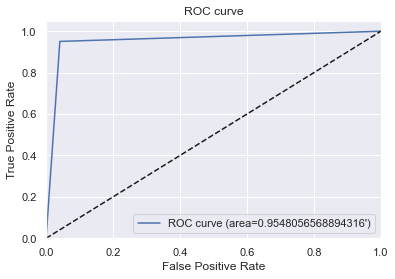

In [6]:
params = {'kernel': ['rbf']}
model = evaluate_model_mlflow(SVC, X_train, y_train, X_test, y_test, params, models, "model_svm", experiment_id) 

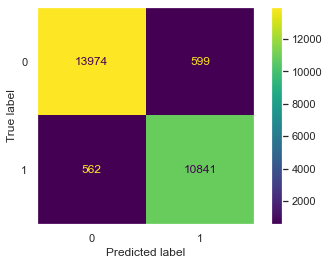

In [35]:
model.confusion_matrix(X_test, y_test)

### Decision tree

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}
Grid search time: 15.523317899998801 s
ROC_AUC = 0.889577695069043

              precision    recall  f1-score   support

           0    0.91632   0.88211   0.89889     14573
           1    0.85620   0.89704   0.87615     11403

    accuracy                        0.88867     25976
   macro avg    0.88626   0.88958   0.88752     25976
weighted avg    0.88993   0.88867   0.88890     25976

Training time: 0.3838661000045249 s


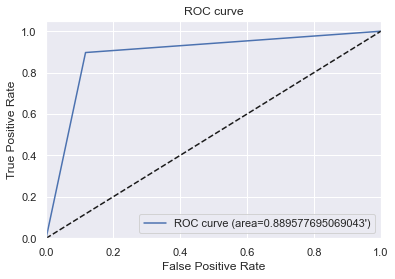

In [17]:
params = {'criterion': ['gini','entropy'], 'splitter': ['best','random'], 'max_depth': [2, 3, 4]}
model = evaluate_model_mlflow(DecisionTreeClassifier, X_train, y_train, X_test, y_test, params, models, "model_dt", experiment_id) 

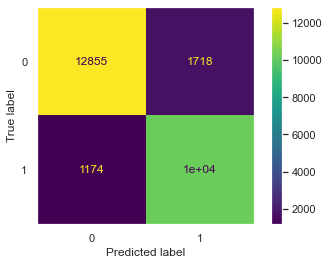

In [26]:
model.confusion_matrix(X_test, y_test)

### Bagging

{'base_estimator': DecisionTreeClassifier(), 'bootstrap_features': False, 'n_estimators': 100, 'random_state': 0}
Grid search time: 806.414273 s
ROC_AUC = 0.9588135570954778

              precision    recall  f1-score   support

           0    0.95630   0.97454   0.96533     14573
           1    0.96665   0.94309   0.95472     11403

    accuracy                        0.96073     25976
   macro avg    0.96148   0.95881   0.96003     25976
weighted avg    0.96084   0.96073   0.96068     25976

Training time: 85.56929190000005 s


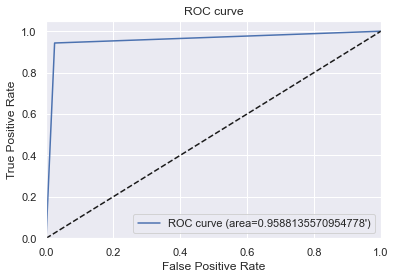

In [5]:
params = {'n_estimators': [100, 50, 80], "random_state": [0], "bootstrap_features": [False], "base_estimator": [DecisionTreeClassifier()]}
model = evaluate_model_mlflow(BaggingClassifier, X_train, y_train, X_test, y_test, params, models, "model_bg", experiment_id) 


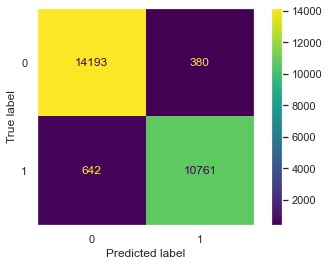

In [39]:
model.confusion_matrix(X_test, y_test)

### Random forest

{'max_depth': 25, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 1200}
Grid search time: 7449.141954299999 s
ROC_AUC = 0.9615090860427256

              precision    recall  f1-score   support

           0    0.95884   0.97660   0.96764     14573
           1    0.96937   0.94642   0.95776     11403

    accuracy                        0.96335     25976
   macro avg    0.96410   0.96151   0.96270     25976
weighted avg    0.96346   0.96335   0.96330     25976

Training time: 248.25776980000046 s


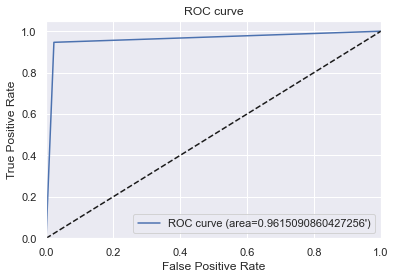

In [7]:
params = {'max_depth': [25, 20], 'min_samples_leaf': [1], 'min_samples_split': [2, 3], "n_estimators": [1000, 1200]}
model = evaluate_model_mlflow(RandomForestClassifier, X_train, y_train, X_test, y_test, params, models, "model_rf", experiment_id) 

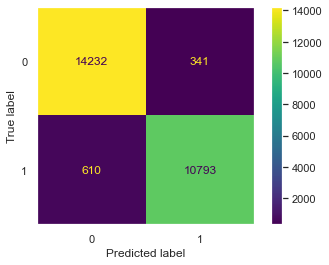

In [41]:
model.confusion_matrix(X_test, y_test)

### Logistic regression

{'random_state': 35}
Grid search time: 8.165095299998939 s
ROC_AUC = 0.859699316601944

              precision    recall  f1-score   support

           0    0.89560   0.84533   0.86974     14573
           1    0.81556   0.87407   0.84380     11403

    accuracy                        0.85795     25976
   macro avg    0.85558   0.85970   0.85677     25976
weighted avg    0.86047   0.85795   0.85835     25976

Training time: 0.3982986999981222 s


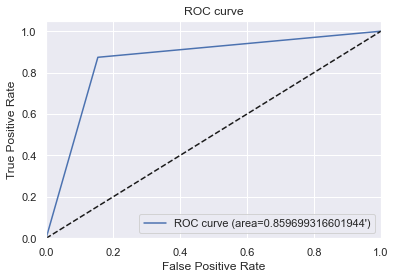

In [16]:
params = {'random_state': [35, 40, 45]}
model = evaluate_model_mlflow(LogisticRegression, X_train, y_train, X_test, y_test, params, models, "model_lr", experiment_id) 

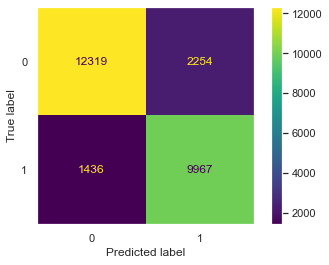

In [43]:
model.confusion_matrix(X_test, y_test)

### K means

{'n_clusters': 2, 'random_state': 0}
Grid search time: 21.137583999996423 s
ROC_AUC = 0.7740498820409712

              precision    recall  f1-score   support

           0    0.84229   0.72051   0.77666     14573
           1    0.69852   0.82759   0.75760     11403

    accuracy                        0.76752     25976
   macro avg    0.77041   0.77405   0.76713     25976
weighted avg    0.77918   0.76752   0.76829     25976

Training time: 1.170134500003769 s


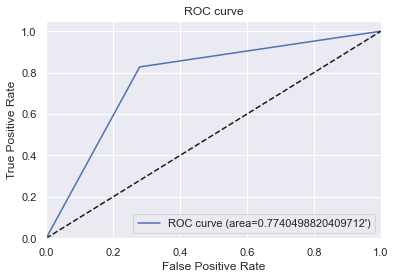

In [15]:
params = {'random_state': [0, 2], "n_clusters": [2]}
model = evaluate_model_mlflow(KMeans, X_train, y_train, X_test, y_test, params, models, "model_km", experiment_id) 

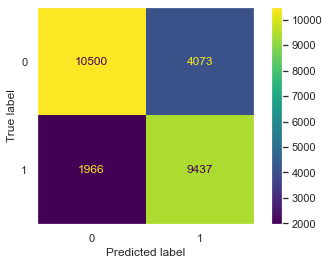

In [45]:
model.confusion_matrix(X_test, y_test)

In [46]:
kmeans_silhouette = silhouette_score(X_train, model.model.labels_).round(2)

In [47]:
print(f"Kmeans silhouette score: {kmeans_silhouette}")

Kmeans silhouette score: 0.15


### Neural network

In [8]:
# Se crea el modelo a entrenar
class Net(nn.Module, Model):
    def __init__(self):
        super(Net, self).__init__()

        self.layer_1 = nn.Linear(19, 64) 
        self.layer_2 = nn.Linear(64, 64)
        self.layer_out = nn.Linear(64, 1) 
        
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.1)
        self.batchnorm1 = nn.BatchNorm1d(64)
        self.batchnorm2 = nn.BatchNorm1d(64)
        
    def forward(self, inputs):
        x = self.relu(self.layer_1(inputs))
        x = self.batchnorm1(x)
        x = self.relu(self.layer_2(x))
        x = self.batchnorm2(x)
        x = self.dropout(x)
        x = self.layer_out(x)
        return x
    
    def predict(self, X):
        X = torch.tensor(X.values).float().detach()
        y_pred = torch.round(torch.sigmoid(self.forward(X))).detach().numpy()
        return y_pred
        
model = Net()

In [9]:
# Se define el dataset
class CustomDataset(Dataset):
  def __init__(self, X, Y):
    super().__init__()
    self.X = torch.tensor(X.values).float()
    self.Y = torch.tensor(Y).float()

  def __len__(self):
    return len(self.X)
  
  def __getitem__(self, idx):
    x = self.X[idx]
    y = self.Y[idx]
    return x, y

In [10]:
# Se crean los dataloaders
params = {
    'batch_size': 64,
    'shuffle': True,
}

train_set = CustomDataset(X_train, y_train)
test_set = CustomDataset(X_test, y_test)

train_loader = torch.utils.data.DataLoader(train_set, **params)
test_loader = torch.utils.data.DataLoader(test_set, **params)

In [11]:
# Se entrena el modelo
dataloaders = {"train": train_loader, "val": test_loader,}
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01,)

In [12]:
losses_train, losses_val, train_time = fit_model(model, criterion, optimizer, dataloaders, len(train_set), len(test_set), epochs=5)

cpu
[1] training loss: 0.15611, validation loss: 0.11214, train accuracy 93.42125701904297, val accuracy 95.30720520019531
[2] training loss: 0.12139, validation loss: 0.11565, train accuracy 94.72392272949219, val accuracy 94.75284576416016
[3] training loss: 0.11233, validation loss: 0.09901, train accuracy 95.17569732666016, val accuracy 95.81922149658203
[4] training loss: 0.10584, validation loss: 0.09961, train accuracy 95.32685852050781, val accuracy 95.95011138916016
[5] training loss: 0.10434, validation loss: 0.10121, train accuracy 95.42961120605469, val accuracy 95.93470764160156


ROC_AUC = 0.9582365240296942

              precision    recall  f1-score   support

           0    0.96048   0.96734   0.96390     14573
           1    0.95787   0.94914   0.95348     11403

    accuracy                        0.95935     25976
   macro avg    0.95918   0.95824   0.95869     25976
weighted avg    0.95934   0.95935   0.95933     25976



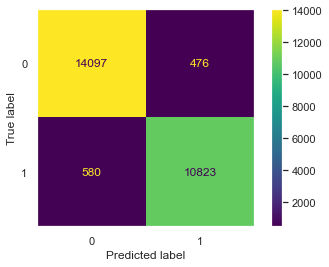

In [13]:
model.classification_report(X_test, y_test)
model.confusion_matrix(X_test, y_test)
model.train_time = train_time
models["model_nn"] = model

In [14]:

with mlflow.start_run(experiment_id=experiment_id, run_name="model_nn"):
    
    mlflow.log_metric("auc", model.roc_auc)
    mlflow.log_metric("precision", model.report["weighted avg"]["precision"])
    mlflow.log_metric("recall", model.report["weighted avg"]["recall"])
    mlflow.log_metric("f1-score", model.report["weighted avg"]["f1-score"])

    tracking_url_type_store = urlparse(mlflow.get_tracking_uri()).scheme
    if tracking_url_type_store != "file":
        mlflow.sklearn.log_model(model, "model_nn", registered_model_name="model")
    else:
        mlflow.sklearn.log_model(model, "model_nn")

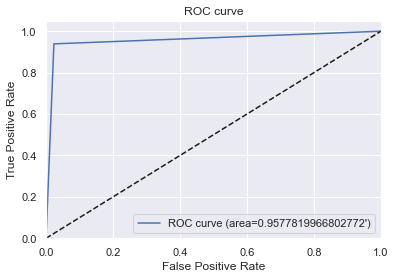

In [54]:
model.plot_curve(X_test, y_test)

### Guardar modelos

In [55]:
for name, obj in models.items():
    file_to_store = open(f"./results/models/{name}.pickle", "wb")
    pickle.dump(obj, file_to_store)